# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [1]:
# YOUR CODE HERE
import pandas as pd
df = pd.read_csv("ca_dds_expenditures.csv")
df

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


Ethnicity
American Indian         4
Asian                 129
Black                  59
Hispanic              376
Multi Race             26
Native Hawaiian         3
Other                   2
White not Hispanic    401
Name: Expenditures, dtype: int64


,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


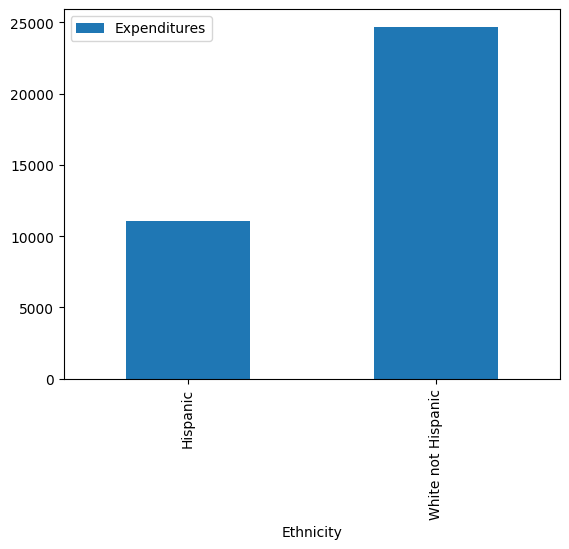

In [2]:
#df.Ethnicity.str.count("Hispanic").sum()
df_group = df.groupby( 'Ethnicity' )[ 'Expenditures' ].count()
print(df_group)



table = pd.pivot_table(data = df , values = 'Expenditures' , index = 'Ethnicity' , aggfunc = 'mean' )
table.loc [ [ 'Hispanic' , 'White not Hispanic' ] ].plot( kind = 'bar' )

#df.Expenditures.sum()
df

According to the graph, the average expenditures the DDS gives betweeen Hispanic reisdents and white (non-Hispanic) residents is vastly different. White (non-Hispanic) residents, on average, receive double the amount of expenditures from the DDS than Hispanic residents.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

<Axes: xlabel='Ethnicity,Age Cohort'>

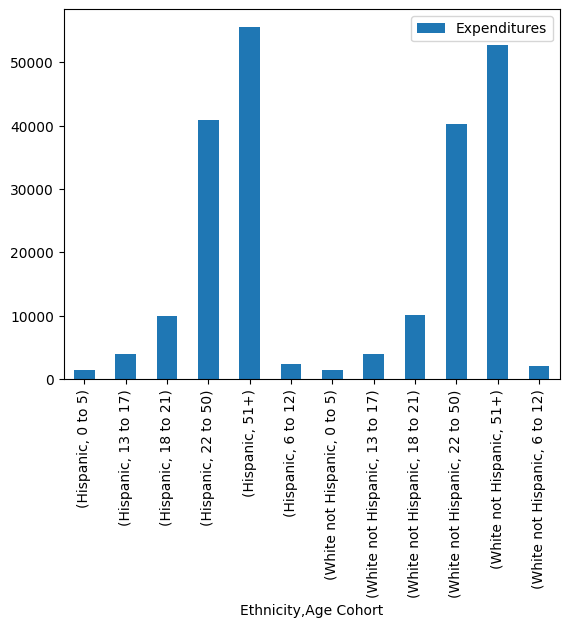

In [3]:
# YOUR CODE HERE
import pandas as pd
df = pd.read_csv("ca_dds_expenditures.csv")

#index = [ 'Ethnicity' , 'Age Cohort' ]

table = pd.pivot_table(data = df , values = 'Expenditures' , index = [ 'Ethnicity', 'Age Cohort'] , aggfunc = 'mean' )
table.loc [ [ 'Hispanic' , 'White not Hispanic' ] ].plot( kind = 'bar' )

According to the graph, it seems that the DDS is fair in terms of the age group that receives the average expenditures. The older age cohort receive more expenditures than the younger age cohorts in both Hispanic residents and white (non-hispanic) residents.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

<Axes: xlabel='Ethnicity,Age Cohort'>

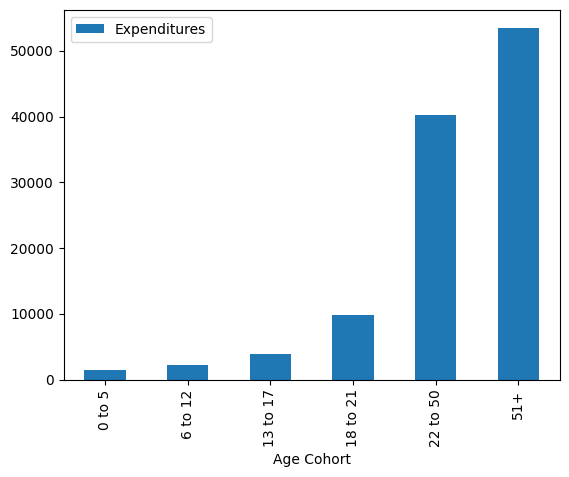

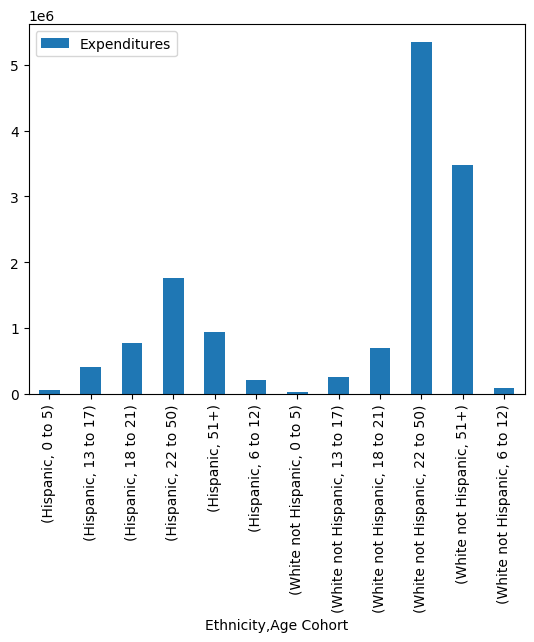

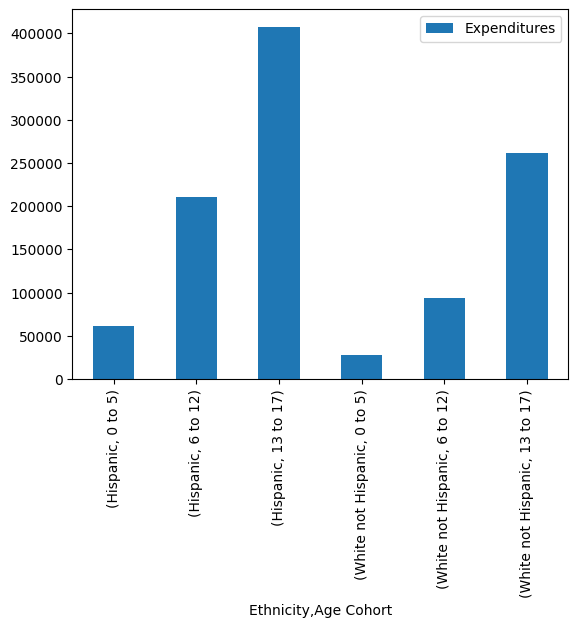

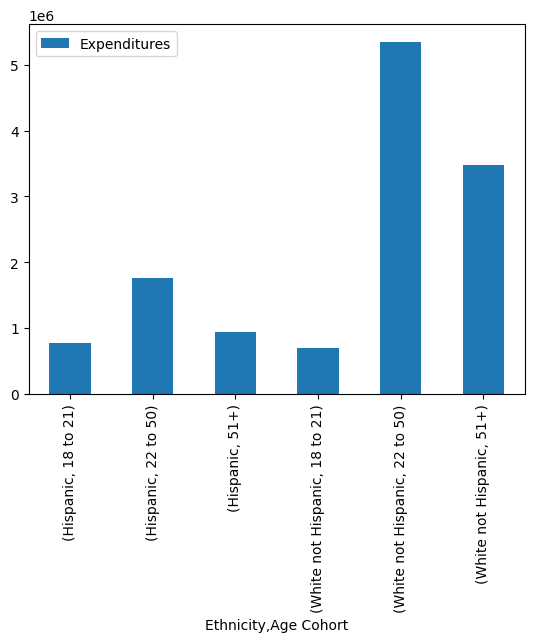

In [4]:
# YOUR CODE HERE (although you may want to add more code cells)

table1 = pd.pivot_table(data = df , values = 'Expenditures' , index = 'Age Cohort' , aggfunc = 'mean' )
table1.loc [ [ '0 to 5', '6 to 12', '13 to 17', '18 to 21', '22 to 50', '51+' ] ].plot( kind = 'bar' )

table2 = pd.pivot_table(data = df , values = 'Expenditures' , index = ['Ethnicity', 'Age Cohort'], aggfunc = 'sum'  )
table2.loc [ [ 'Hispanic','White not Hispanic'] ].plot( kind = 'bar' )
table2.loc [ [ ['Hispanic','0 to 5'], ['Hispanic','6 to 12'], ['Hispanic','13 to 17'], ['White not Hispanic', '0 to 5'], ['White not Hispanic', '6 to 12'], ['White not Hispanic', '13 to 17']] ].plot( kind = 'bar' )
table2.loc [ [ ['Hispanic','18 to 21'], ['Hispanic','22 to 50'], ['Hispanic','51+'], ['White not Hispanic', '18 to 21'], ['White not Hispanic', '22 to 50'], ['White not Hispanic', '51+']] ].plot( kind = 'bar' )



#table2 = pd.pivot_table(data = df , values = 'Expenditures' , index = [ 'Ethnicity', 'Age Cohort'] , aggfunc = 'mean' )
#table2.loc [ [ 'Hispanic' , 'White not Hispanic', 'Asian' ] ].plot( kind = 'bar' )

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**
Based on the statistics of the csv file. It's about even that Hispanic and White residents are receiving funds from the DDS. From the one thousand of residents receiving funds from the DDS, 37.6% are Hispanics and 40.1% are whites. Seems Hispanics and whites are more favored to receive funds than other races.

It also seems that the amount being distributed evenly to Hispanics and whites in terms of age cohorts. The younger groups of age cohorts receive significantly less funds than the older age cohorts. No indication of discrimination in terms of age cohort.

The discrepancy seems to lie in the mean. Taking the mean evens out what each resident based on ethnicity is suppose to receive. So on when placed a graph, the differences seem minimal. However, when the actual number is presented, that's when differences can become more clear and transparent. 

The mean is not a good indicator of finding a middle value or average. The median would be a good indicator of finding a middle value. The mean can be skewed by outliers or missing information. Therefore the mean can be misinterpreted and the graph can be misrepresented.